<div style="border:solid green 2px; padding: 20px">
<h2> Комментарий ревьюера </h2>
    
Привет :) Меня зовут Макеева Таня, и я буду делать ревью твоей работы. Предлагаю общаться на "ты", надеюсь, ты не против :)

Мои комментарии ты сможешь найти по заголовку "комментарий ревьюера", а ещё они отмечены тремя цветами:   
 
<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>
    
Красным цветом выделены более критические моменты, которые обязательно нужно исправить.
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Жёлтым цветом выделены некоторые недочёты, которые тоже стоит улучшить. Если они совсем незначительные и их немного, работа может быть принята.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
И зелёным цветом выделены советы на будущее, а также места, которые получились у тебя лучше всего.
    
</div>


Давай вести диалог через комментарии. Задавай вопросы, если такие будут, а также пиши об изменениях в ответ на мои комментарии. Пожалуйста, оставляй свои сообщения заметным цветом, отличным от моих, чтобы я ничего не упустила. 

<div class="alert alert-info">
<h2> Комментарий студента </h2>

К примеру, так
    
</div>

И не удаляй комментарии, чтобы вся история общения была перед глазами :)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Мои комментарии по второй итерации будут с отметкой v2 :)
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3</h2>
    
Мои комментарии по третьей итерации будут с отметкой v3 :)
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v4</h2>
    
Мои комментарии по четвёртой итерации ты сможешь найти с отметкой v4 :)
    
</div>

<strong style="font-size: 13pt">Описание проекта: </strong>
<p> Отдел маректинга подготовил список гипотез для увеличения выручки</p>

<strong style="font-size: 13pt">Задача: </strong>
<p> Приоритезировать гипотезы, запустите A/B-тест и проанализировать результаты. </p>

### Шаг 1. Загружаем данные и подготавливаем их к анализу

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [2]:
print('Данные из таблицы "Гипотезы":')
hypothesis.info()
print('\n Данные из таблицы "Заказы":')
orders.info()
print('\n Данные из таблицы "Визиты":')
visitors.info()

Данные из таблицы "Гипотезы":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

 Данные из таблицы "Заказы":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

 Данные из таблицы "Визиты":
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Во всех файлах присутсвубт все данные. Есть некорреткный тип данных "дата", разюеремся с ними в процессе

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Типы данных проверены, пропуски тоже. А что на счет дубликатов? Эту проверку тоже не стоит забывать.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>
    
Прошу прощения, в своей версии быстро пробил информацию и не удосужился оставить) Ниже:

In [3]:
print('Количество задублированных строчек по массиву "гипотезы":',hypothesis.duplicated().sum())
print('Количество задублированных строчек по массиву "заказы":',orders.duplicated().sum())
print('Количество задублированных строчек по массиву "посетители":',visitors.duplicated().sum())

Количество задублированных строчек по массиву "гипотезы": 0
Количество задублированных строчек по массиву "заказы": 0
Количество задублированных строчек по массиву "посетители": 0


<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Отлично, что добавил!
    
Только точно "заблированных"? :)
    
</div>

### Шаг 2. Приоритезация гипотез

<em style="color:#0015f0"> Применияем фреймворки ICE:</m>

In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(1)

display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0


<em style="color:#0015f0"> Применияем фреймворки RICE:</m>

In [5]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']).round(1)

pd.set_option('display.max_colwidth', -1)
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


<strong style="font-size: 13pt">Вывод: </strong>
<p> Очевидно, что при добавлении метрики Reach (RICE) результаты приоритезации сильно изменились, т.к. сильно стало влиять количество затронутых гипотезой пользователей</p>
<li> Значительно впереди по методике RICE вырвалась: "добавление формы подписки на все основные страницы..."  </li>
<li> Гипотеза с добавлением блока рекомендендаций товаров значительно скакнуло по приоритезации (RICE), несмотря не свой потенциально низкий вклад (по данным маркетологов) </li>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Расчёты по метрикам проведены верно. Приоритезация гипотез тоже правильная. Различие между метриками подчёркнуто верно. Молодец :)
    
Ещё здесь можно было отметить, что первая пятёрка гипотез по обоим методам одинакова :)
    
</div>

### Шаг 2. Анализ A/B-теста

Проверим, нет ли в группе пользователей, которые входили в обе группы, дабы тес можно было считать валидным:

In [6]:
orders_dup_check = orders.groupby('visitorId').agg({'group':'sum'}).sort_values(by='group', ascending=False).reset_index()
dup_list = [] #список ID пользоваталей, которые поучаствовали и в контрольной и в тестовой группе

def duplication(data):
    if ('A') in data['group']:
        if ('B') in data['group']:
            dup_list.append(data['visitorId'])
            return 'Yes'
    else:
        return 'No'

orders_dup_check['group_duplication'] = orders_dup_check.apply(duplication, axis=1)

display(orders_dup_check.sort_values(by='group_duplication', ascending=False).head(5))
print(orders_dup_check['group_duplication'].value_counts())

,visitorId,group,group_duplication
0,3062433592,BBBAB,Yes
558,1230306981,ABBAA,Yes
565,2927087541,AB,Yes
564,2954449915,AB,Yes
563,3766097110,AB,Yes


No     528
Yes    58 
Name: group_duplication, dtype: int64


Как видно из анализа, это существенная группа пользователей, которая может значительно повлиять на тест гипотезы. В связи с чем необходимо отфильтровать данные за вычетом данных пользователей:

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Отлично, что делаешь такую проверку! Метод duplication() написан верно, но можно было иначе использовать условный опреатор if. Вместо двух проверок подряд можно было написать одну: if ('A') in data['group'] and ('B') in data['group'].
    
</div>

In [7]:
orders_wo_dup = orders.query('visitorId not in @dup_list')
print(orders_wo_dup.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null int64
group            1016 non-null object
dtypes: int64(3), object(2)
memory usage: 47.6+ KB
None


Избавились от ~180 строк или ~17% данных. Теперь данные для анализа гипотез можно считать корректными. Приступаем к анализу, подготаливаем данные для расчетов и визуализации

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
В код ниже стоит добавить комментарии, чтобы работа стала более понятной и прозрачной :)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Добавляем комментарии: 
Считаем куммулятивные данные для построения графиков

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2</h2>
    
Всё-таки было бы хорошо прокомментировать через # промежуточные этапы внутри ячейки с кодом. Для стороннего наблюдателя это может быть неочевидным. Нам же надо старался делать свою работу так, чтобы она была понятно коллеге / клиенту, которые не вникали в неё  процессе.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Добавлено

<div class="alert alert-success">
<h2> Комментарий ревьюера v3</h2>
    
Отлично :)
    
</div>

In [8]:
orders_wo_dup['date'] = pd.to_datetime(orders_wo_dup['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

#Создаем массив по периодам теста для групп
datesGroups  = orders_wo_dup.loc[:,['group', 'date']].drop_duplicates()

#Создаем массив куммулятивных данных по дням по заказам
ordersAggregated = datesGroups.apply(
lambda x: orders_wo_dup[np.logical_and(orders_wo_dup['date'] <= x['date'], 
                                       orders_wo_dup['group'] == x['group'])].agg({'date' : 'max',
                                                                                   'group' : 'max',
                                                                                   'transactionId' : 'nunique',
                                                                                   'visitorId' : 'nunique',
                                                                                   'revenue' : 'sum'}), 
                                        axis=1).sort_values(by=['date','group'])

#Создаем массив куммулятивных данных по дням по визитам
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group'])].agg({'date' : 'max', 
                                                                                                                'group' : 'max', 
                                                                                                                'visitors' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])

#Создаем общий массив куммулятивных данных по дням
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Данные для построения графиков подготовлены верно. Отлично :)
    
А ещё подобного рода вычисления можно сделать при помощи метода cumsum(), которые есть в пакете pandas. Этот метот используется для расчёта кумулятивных сумм, обрати на него внимание :)
    
Обрати внимание на предупреждение. Чтобы оно не появлялось, в сточках с преобразованием даты лучше обращаться к данным через .loc(). Например, вот так у меня отработано без предупреждения: orders_wo_dup.loc[:, 'date'] = pd.to_datetime(orders_wo_dup['date'], format='%Y-%m-%d').

</div>

<em style="color:#0015f0"> Строим график куммулятивной выручки по группам</m>

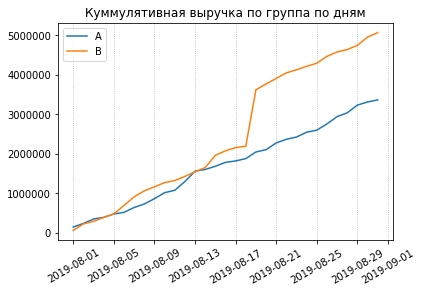

In [9]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Куммулятивная выручка по группа по дням')
plt.xticks(rotation=30)
plt.grid(axis='x',linestyle=':')
plt.legend()

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Обрати внимание на предупреждение, которое появилось при построение графика. Чтобы его избежать нужно добавить следующие строчки перед построением:
    
- from pandas.plotting import register_matplotlib_converters
- register_matplotlib_converters()
    
На данный момент, это не обязательно, код отработает и без них. Но в будущих версиях, когда будет необходимость вызвать конвертер типов данных, эти строчки будут обязательны.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Спасибо!

<strong style="font-size: 13pt">Вывод: </strong>
<p> До ~18.08.2019 выручка росла с перепадами в пользу группы 'B'. После этой даты в оден день случился резкий скачок и группа 'B' значительно вырвалась вперед примерно в 2 раза. Предполагается, что на эту дату пришелся выброс - крупный заказ от пользвателя / ограниченного числа пользователей</p>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
График построен верно. А вот к выводу есть вопросы. Не понятно, как читались 10% и что они значат. Можно подробнее, что тут имелось в виду? И что значит ~х2.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

~10% - отклонение кумм. выручки групп друг от друга на разные периоды времени до аномального скачка
    
~x2 - разница кумм. суммы группы 'B' по сравнению с группой 'A' после аномальной покупки
    
считалось все из графика, поэтому везде отношения примерны

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2</h2>
    
Лучше или приводить расчёты, или писать только те числа, которые очевидны на глаз. Иначе не совсем понятно, откуда они берутся. Также обозначение ~x2 не понятно всё-равно. Имеется в виду "приблизительно в два раза"? Можно прочитать это и как "икс два". Не стоит употреблять такие сокращение. Лучше писать всё так, чтобы было понятно каждому :)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Поправлено

<div class="alert alert-success">
<h2> Комментарий ревьюера v4</h2>
    
Отлично :)
    
</div>

<em style="color:#0015f0"> Строим график куммулятивного среднего чека по группам</m>

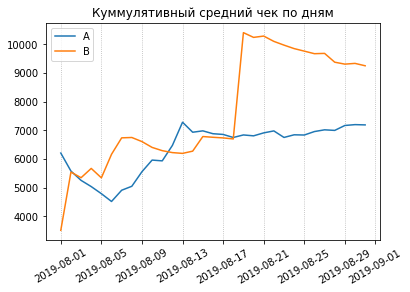

In [10]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Куммулятивный средний чек по дням')
plt.xticks(rotation=30)
plt.grid(axis='x',linestyle=':')
plt.legend()

<strong style="font-size: 13pt">Вывод: </strong>
<p> Средний чек колебался не так очевидно, как средняя выручка и в период ~11.09 - 17.09 группа 'B' слегка больше набирала чек. В тот же день ~18.09 произошел всплеск данных, что значительно подняло чек группы 'В' ~2 раза. В дальнейшем наблюдается стремление среднего чека группы 'В' к чеку группы 'Ф', что как раз-таки аргументирует в пользу временного всплеска выручки - аномалией. Необходимо в дальнейшем очистить данные от выбросов и посмотреть на получаемые результаты заново</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
В целом вывод по графику верный. Отлично :) Действительно, такой большой всплеск должен быть устранён при фильтрации аномалий. Ты верно упоминаешь это.
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Лучше не использвоать неочевидные сокращения типа ~x2. Давай словами? :)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Поправлено, но все еще на свой лад)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Так лучше :)
    
</div>

<em style="color:#0015f0"> Строим график относительного изменения кумулятивного среднего чека группы B к группе A</m>

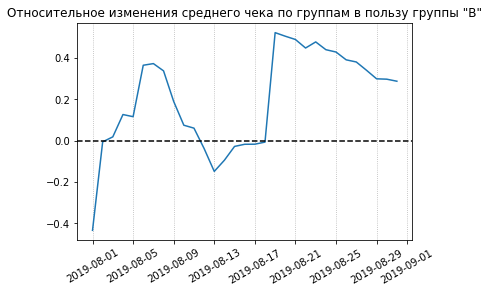

In [11]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменения среднего чека по группам в пользу группы "В"')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=30)
plt.grid(axis='x',linestyle=':')

<strong style="font-size: 13pt">Вывод: </strong>
<p> Более очевидный график, который показывает преобладание на первой неделе чека у группы 'В', но в дальнейшем данные начали выравниваться с группой 'B'. ~18.09 скачок и дальнейший возврат к паритету</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
График построен верно. Здорово, что на рисунке ещё отмечено значение, с которым стоит сравнивать основной график, чтобы сделать выводы. Молодец :)
    
</div>

<em style="color:#0015f0"> Строим график кумулятивной конверсии по группам</m>

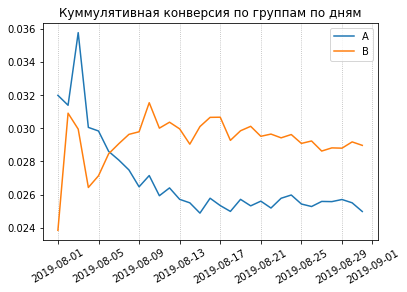

In [12]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Куммулятивная конверсия по группам по дням')
plt.xticks(rotation=30)
plt.grid(axis='x',linestyle=':')
plt.legend()

<strong style="font-size: 13pt">Вывод: </strong>
<p> В данном случае график очевидно говорит в пользу группы 'В' и  визуально  значительно на него не сказались какие либо выбросы</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Вывод по графику верный. Отлично :) Ещё здесь можно было сделать вывод о том, стабилизировались конверсии или нет.
</div>

<em style="color:#0015f0"> Строим график относительного изменения кумулятивной конверсии группы B к группе A</m>

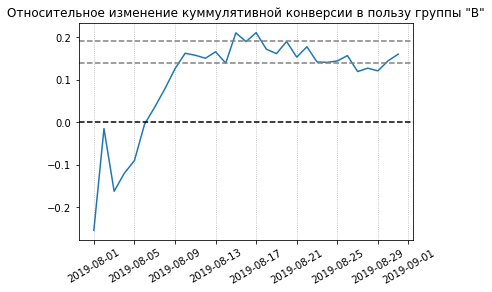

In [13]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительное изменение куммулятивной конверсии в пользу группы "В"')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axhline(y=0.19, color='grey', linestyle='--')
plt.xticks(rotation=30)
plt.grid(axis='x',linestyle=':')

<strong style="font-size: 13pt">Вывод: </strong>
<p> Подтверждается вывод из прошлого графика, что у группы 'В конверсия достаточно стабильна. После выхода на примелимый объем данных отношение конверсий колеблится в корридоре 14%-19% в пользу группы 'B' </p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Классно, что на графике отмечены те значения, которые ты упоминаешь в выводе :)
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Смущает формулировка "конверсия колеблится в корридоре 0.14 - 0.19". Это разве график конверсии? Это конверсия на колеблется? Или всё таки отношение конверсий?
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Да, все верно, спасибо. Поправлено

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Отлично :)
    
</div>

<em style="color:#0015f0"> Строим точечный график количества заказов по пользователям</m>

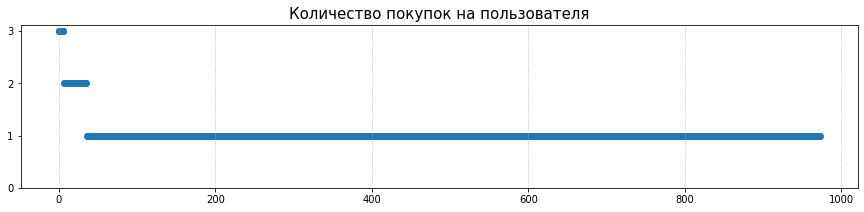

(0, 50)

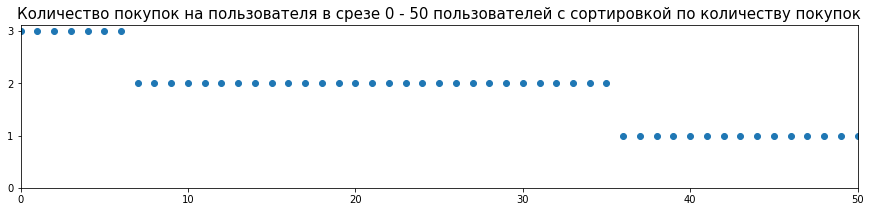

In [14]:
orders_data = orders_wo_dup.groupby(['visitorId']).agg({'transactionId':'count'}).sort_values(by='transactionId', 
                                                                                               ascending=False)

#fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, figsize=(17,5))
plt.subplots(figsize=(15,3))
plt.scatter(range(0,len(orders_data['transactionId'])), orders_data['transactionId'])
plt.title('Количество покупок на пользователя', fontdict={'fontsize':'15'})
plt.yticks(np.arange(0, 3.2, step=1))
plt.grid(axis='x',linestyle=':')
plt.show()


plt.subplots(figsize=(15,3))
plt.scatter(range(0,len(orders_data['transactionId'])), orders_data['transactionId'])
plt.title('Количество покупок на пользователя в срезе 0 - 50 пользователей с сортировкой по количеству покупок',fontdict={'fontsize':'15'})
plt.yticks(np.arange(0, 3.2, step=1))
plt.xlim(0, 50)

<strong style="font-size: 13pt">Вывод: </strong>
<p> Из имеющегося объема данных лишь малая часть заказывала больше одного раза ~35 пользователей. Скорее всего мы останемся в рамках 1 заказа на пользователя</p>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
По графику выглядит так, что "точек" для двух заказов больше, чем для одного. Кажется, неочень здорово ограничить значения по оси X. Так твои выводы выглядят необоснованными. 
    
И хотелось вы увидеть, как рассчитано, что больше одного раза заказывают ~35 пользователей? Цифры в выодах должны быть подкреплены расчётами.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Исправлено:
- Добавлен график для всех пользователей
    
Как рассчитано? - график отсортирован по убыванию, поэтому на срезе 0-50 можно легко посчитать количество пользователей

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Было бы хорошо, так и добавить в вывод "Из имеющегося объема данных лишь малая часть заказывала больше одного раза: ~35 пользователей. Это видно по графику, где отображено 50 пользователей. Сортировка идёт по убыванию, поэтому все пользователи с 2мя и 3мя заказами располгаются в одном месте (по оси X до 35)".
    
</div>

<em style="color:#0015f0"> Убираем аномальных пользователей на основании числа покупок</m>

In [15]:
print(np.percentile(orders_data['transactionId'], [95,99]))

to_order_list = orders_data[orders_data['transactionId'] >1].reset_index()
order_list_to_delete = to_order_list['visitorId'].tolist()
orders_filtered = orders_wo_dup.query('visitorId not in @order_list_to_delete') #Создаем новый список, исключая все аномалии

[1. 2.]


<strong style="font-size: 13pt">Вывод: </strong>
<p>За основу возьмем 95-персентиль и пользователей, которые совершали всего одну покупку</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Выбор границы для аномалий уместный. Фльтрация проведена корректно :) Супер!
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Обрати внимание, что тут мы говорим про 95й перцентиль. Квартиль - это частный случай перцентиля (25%, 50%, 75%, 100%)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Да, это описка, спасибо. Я даже потом вспомнил эту ошибку, когда сдал работу)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Отлично, главное, что есть понимание, что же это значит :)
    
</div>

<em style="color:#0015f0"> Строим точечный график стоимостей заказов</m>

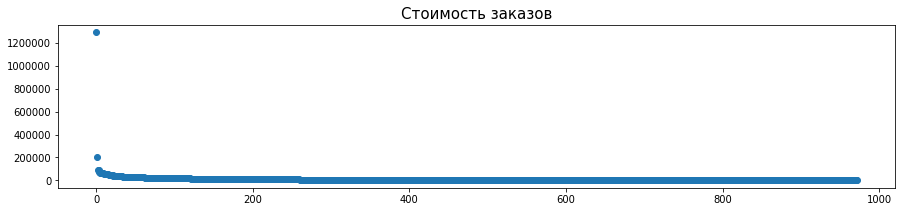

(0, 10)

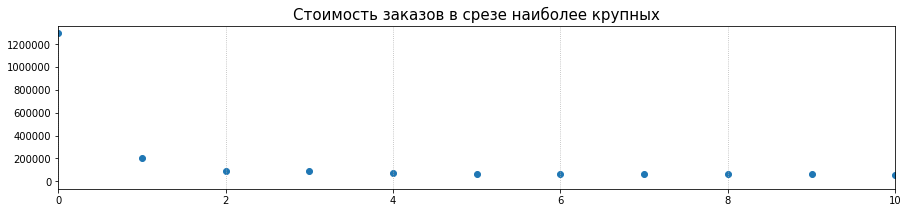

In [16]:
revenue_data = orders_wo_dup.groupby(['visitorId']).agg({'revenue':'sum'}).sort_values(by='revenue', 
                                                                                               ascending=False)


plt.subplots(figsize=(15,3))
plt.scatter(range(0,len(revenue_data['revenue'])), revenue_data['revenue'])
plt.title('Стоимость заказов',fontdict={'fontsize':'15'})
plt.show()

plt.subplots(figsize=(15,3))
plt.scatter(range(0,len(revenue_data['revenue'])), revenue_data['revenue'])
plt.title('Стоимость заказов в срезе наиболее крупных',fontdict={'fontsize':'15'})
plt.grid(axis='x',linestyle=':')
plt.xticks(np.arange(0, 1000, step=2))
plt.xlim(0, 10)

<strong style="font-size: 13pt">Вывод: </strong>
<p>На графике присутствует всего 1-2 аномалии. Предполагаем, что именно они прощошло с гуппой "B" в период ~18.09, при значительном росте кумм. выручки Средний чек по заказам достаточно высокий..</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Очень загадочный вывод получился :) Я конечно догадываюсь о чем ты, но давай всё-таки допишешь свою мысль явно? 
    
Но больше меня настораживает график. Давай всё-таки ты уберешь ограничение по оси X. Иначе этот рисунок вообще не показательный :(
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Поправлено

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Здорово, что учёл комментарий! Кстати, здесь ещё можно было более детально посмотреть на общую ситуацию, ограничив значения по оси Y.
    
</div>

<em style="color:#0015f0"> Убираем аномальных пользователей на основании суммы покупки</m>

In [17]:
print(np.percentile(revenue_data['revenue'], [95,99]))

to_revenue_list = revenue_data[revenue_data['revenue'] >= 28910].reset_index()
revenue_list_to_delete = to_revenue_list['visitorId'].tolist()
orders_filtered = orders_filtered.query('visitorId not in @revenue_list_to_delete') #основной массив с заказами после чистки выбросов

[28910. 59082.]


<strong style="font-size: 13pt">Вывод: </strong>
<p>Возьмем 95-персентиль с заказами меньше 28К руб.</p>

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>
    
Отлично, теперь пользователи полностью "чисты" от аномалий :)
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
Тот же самый комментарий про квартиль, что и выше :)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Поправлено

<em style="color:#0015f0"> Считаем статистическую значимость различий в конверсии между группами по "сырым" и "очищенным" данным</m>

##### Нулевая гипотеза: 
представленные средние по конверсиям у группы "А" и группы "B" равны
##### Альтернативная гипотеза:
представленные средние по конверсиям у группы "А" и группы "B" не равны

Посчитаем p-value для конверсий по сырым и очищенным данным

In [18]:
#Сырые данные
ordersByUsersA_raw = orders_wo_dup[orders_wo_dup['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsersA_raw.columns = ['visitorId', 'transactions']

sampleA_raw = pd.concat([ordersByUsersA_raw['transactions'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                                                           - len(ordersByUsersA_raw['transactions'])), name='transactions')],axis=0)

ordersByUsersB_raw = orders_wo_dup[orders_wo_dup['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB_raw.columns = ['visitorId', 'transactions']

sampleB_raw = pd.concat([ordersByUsersB_raw['transactions'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                                                           - len(ordersByUsersB_raw['transactions'])), name='transactions')],axis=0)

alpha = 0.05

results_raw = stats.mannwhitneyu(sampleB_raw, sampleA_raw)

print("P-value значение по конверсиям в группах до очистки данных: ", results_raw.pvalue.round(4))

if (results_raw.pvalue < alpha):
    print("Вывод: Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Отношения конверсии группы 'B' и группы 'A' (B/A) до очистки данных: {0:.2f}".format(sampleB_raw.mean()/sampleA_raw.mean()-1))

P-value значение по конверсиям в группах до очистки данных:  0.0055
Вывод: Отвергаем нулевую гипотезу: разница статистически значима
Отношения конверсии группы 'B' и группы 'A' (B/A) до очистки данных: 0.16


In [19]:
#Очищенные данные
ordersByUsersA_filt = orders_filtered[orders_filtered['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA_filt.columns = ['visitorId', 'transactions']

sampleA_filt = pd.concat([ordersByUsersA_filt['transactions'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() 
                                                                           - len(ordersByUsersA_filt['transactions'])), name='transactions')],axis=0)

ordersByUsersB_filt = orders_filtered[orders_filtered['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB_filt.columns = ['visitorId', 'transactions']

sampleB_filt = pd.concat([ordersByUsersB_filt['transactions'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() 
                                                                           - len(ordersByUsersB_filt['transactions'])), name='transactions')],axis=0)

results_filt = stats.mannwhitneyu(sampleB_filt, sampleA_filt)

print("P-value значение по конверсиям в группах после очистки данных: ", results_filt.pvalue.round(4))

if (results_filt.pvalue < alpha):
    print("Вывод: Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("Отношения конверсии группы 'B' и группы 'A' (B/A) после очистки данных:{0:.2f}".format(sampleB_filt.mean()/sampleA_filt.mean()-1))

P-value значение по конверсиям в группах после очистки данных:  0.0063
Вывод: Отвергаем нулевую гипотезу: разница статистически значима
Отношения конверсии группы 'B' и группы 'A' (B/A) после очистки данных:0.18


<strong style="font-size: 13pt">Вывод: </strong>
<p> Нулевая гипотеза отвергнута. Что "до", что "после" в представленных данных присутсвует статистически значимое различие. После очистки от выбросов группа "B" показала результат даже еще лучше</p>

<div class="alert alert-danger">
<h2> Комментарий ревьюера </h2>
    
Данные для тестирования подготовлены не верно.
    
В данном пункте важно провести тест на "сырых" и "очищенных" данных. То есть сначала мы проводим тест на данных, где аномалии ещё есть.
    
Если ты решаешь исключить из рассмотрения пользователей, которые входят в обе группы, то это стоит сделать и для очищенных, и для сырых данных. 
    
Также важно при подготовке учесть тех пользователей, которые только посетили сайт, но ничего не купили.
    
Предлагаю тебе более подробно разобрать раздел в тренажёре по анализу результатов AB теста https://praktikum.yandex.ru/learn/data-analyst/courses/2bb03488-4558-4da8-a823-dcbb35e43d7c/sprints/317/topics/0981c10e-3269-4e1a-bc3c-be9b60feed94/lessons/30a339aa-3b49-410d-9c75-beac0680cce0/.
    
А ещё при проверке гипотез важно сформулировать нулевую и альтернативную гипотезу для каждого теста. Сделай это, пожалуйста, для полного понимания процесса :)
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Прости, возможно, за тупые вопросы, но...
    
<blockquote>Также важно при подготовке учесть тех пользователей, которые только посетили сайт, но ничего не купили.</blockquote>

Так хорошо считалось, все испортила &#128522; Спасибо, некорректно понял метод анализа, исправил
    
<blockquote>Если ты решаешь исключить из рассмотрения пользователей, которые входят в обе группы, то это стоит сделать и для очищенных, и для сырых данных</blockquote>

В данном случае оба массива - orders_filtered (который в свою очередь формируется из orders_wo_dup) и orders_wo_dup отфилтрованы по пользователям, которые не присутсвовали в обоих группах
    
<blockquote>А ещё при проверке гипотез важно сформулировать нулевую и альтернативную гипотезу для каждого теста. Сделай это, пожалуйста, для полного понимания процесса :) </blockquote>

Добавлено

<div class="alert alert-success">
<h2> Комментарий ревьюера v2</h2>
    
Прошу прощения, пересмотрела расчёты, этот комментарий был не уместен:
    
<blockquote>В данном пункте важно провести тест на "сырых" и "очищенных" данных. То есть сначала мы проводим тест на данных, где аномалии ещё есть.

Если ты решаешь исключить из рассмотрения пользователей, которые входят в обе группы, то это стоит сделать и для очищенных, и для сырых данных.</blockquote>
    
Отлично, что ты подготовил данные, учитывая тех, кто ничего не купил. Тут всё ок :)
    
</div>

<div class="alert alert-danger">
<h2> Комментарий ревьюера v2</h2>
    
Формулировки гипотез следует пересмотреть. Не понятно, что значит "представленные массивы являются статистически значимыми". Мы не проверяем насколько значимы массивы. Мы проверяем различие между данным с точки зрения средних. И тут важно правильно задать нулевую и альтернативную гипотезы: в какой мы считаем, что средние равны, а в какой нет. Измени, пожалуйста, формулировку. И гипотезы нужно написать для всех тестов, то есть для среднего чека тоже.
    
Также после твоих правок выводов очевидно стало ещё одно не понимание. Давай разбираться.
    
**Нулевая гипотеза** - всегда про **равенство**. Тут мы проверяем равенство средних двух выборок. То есть в одном случае - равенство конверсий, во втором - равенство средних чеков.
    
Также есть некие проблемы с интерпретацией. 
    
- Мы **принимаем нулевую гипотезу**, если **p-value больше alpha**.
- Мы **отвергаем нулевую гипотезу**, если **p-value меньше alpha**.
    
Пожалуйста, пересмотри выводы по тестам.   
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Спасибо. Давай тогда так, скорректировал весь блок с гипотезами и выводами

<em style="color:#0015f0"> Считаем статистическую значимость различий в среднем чеке между группами по "сырым" и "очищенным" данным</m>

##### Нулевая гипотеза: 
представленные средние по средним чекам у группы "А" и группы "B" равны
##### Альтернативная гипотеза:
представленные средние чекам у группы "А" и группы "B" не равны

<div class="alert alert-warning">
<h2> Комментарий ревьюера v3</h2>
    
Не стоит писать "средние по средним". Равенство средних чеков мы проверяем через равенство средних двух выборок, содержаших чеки. Так что здесь лучше писать просто "средние чеки"
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера v4</h2>
    
Пересмотри ещё раз формулировки гипотез с точки зрения комментария выше :)
    
</div>

In [20]:
results_filt_revenue = stats.mannwhitneyu(orders_filtered[orders_filtered['group'] == 'A']['revenue'], 
                                  orders_filtered[orders_filtered['group'] == 'B']['revenue'])


results_revenue_raw = stats.mannwhitneyu(orders_wo_dup[orders_wo_dup['group'] == 'A']['revenue'], 
                                  orders_wo_dup[orders_wo_dup['group'] == 'B']['revenue'])
#По сырым данным
print('P-value по среднему чеку в группах до очистки данных - ', results_revenue_raw.pvalue.round(3))

if (results_revenue_raw.pvalue < alpha):
    print("Вывод: Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print('Отношения средних чеков группы "В" и группы "А" до очистки данных: {:.2f}'.format(((orders_wo_dup[orders_wo_dup['group'] == 'A']['revenue'].sum()/
                                    orders_wo_dup[orders_wo_dup['group'] == 'A']['transactionId'].count())/
                                    (orders_wo_dup[orders_wo_dup['group'] == 'B']['revenue'].sum()/
                                     orders_wo_dup[orders_wo_dup['group'] == 'B']['transactionId'].count())).round(3)))

#По очищенным данным
print('\n P-value по среднему чеку в группах после очистки данных - ', results_filt_revenue.pvalue.round(3))

if (results_filt_revenue.pvalue < alpha):
    print("Вывод: Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")
    

print('Отношения средних чеков группы "В" и группы "А" после очистки данных: {:.2f}'.format(((orders_filtered[orders_filtered['group'] == 'A']['revenue'].sum()/
                                    orders_filtered[orders_filtered['group'] == 'A']['transactionId'].count())/
                                    (orders_filtered[orders_filtered['group'] == 'B']['revenue'].sum()/
                                     orders_filtered[orders_filtered['group'] == 'B']['transactionId'].count())).round(3)))

P-value по среднему чеку в группах до очистки данных -  0.415
Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Отношения средних чеков группы "В" и группы "А" до очистки данных: 0.78

 P-value по среднему чеку в группах после очистки данных -  0.418
Вывод: Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Отношения средних чеков группы "В" и группы "А" после очистки данных: 1.01


<strong style="font-size: 13pt">Вывод: </strong>
<p>Нулевая гипотеза принята в связи с  превышением порогового значение 0.05. Что "до", что "после" в представленных данных не наблюдается статистически значимых различий. После очистки от выбросов группа "B" сравнялась по результатам с группой "A" по соотношению стоимостей</p>

<div class="alert alert-danger">
<h2> Комментарий ревьюера v3</h2>
    
Очевидно, что возникло непонимание. Нужно было пересмотреть выводы и гипотезы по всем тестам. И я ещё раз выделю:
    
- Мы **принимаем нулевую гипотезу**, если **p-value больше alpha**.
- Мы **отвергаем нулевую гипотезу**, если **p-value меньше alpha**.
    
И давай, чтобы я убедилась полностью в твоём понимании. Напиши, пожалуйста, напрямую: Мы отвергаем / принимаем нулевую гипотезу, так как ... Следовательно, средние чеки групп A и B равны / не равны. У тебя получаются туманные формулировки, я не могу бть уверена, что ты разобрался с  этим вопросом. Текущие формулировки слишком неоднозначны. Лучше употреблять не "данные являются статистически значимыми / не значимыми", а "имеется / отсутствует статистически значимое различие" и "следовательно средние у выборок равны / не равны".
    
И, пожалуйста, сделай то же самое с выводом по конверсии.
</div>

<div class="alert alert-info">
<h2> Комментарий студента v.3: Формулирование выводов </h2>

<strong>Конверсия:</strong>

Мы отвергаем нулевую гипотезу о равенстве средних, т.к. p-value меньше критического уровня статистической значимости. Следовательно группы A и B не равны и в них имеется статистически значимое различие. Следовательно средние у выборок не равны.
    

<strong>Средний чек:</strong>

Мы принимаем нулевую гипотезу о равнетстве средних, т.к. p-value больше критического уровня статистической значимости. Следовательно группы А и В равны и в них отсутствует статистически значимое различие. Следовательно средние у выборок равны

<div class="alert alert-success">
<h2> Комментарий ревьюера v4</h2>
    
Уже намного лучше, но добавлю комментарии на будущее.
    
При проверке гипотезы ты не можешь говорить, что **выборки равны / не равны**. В данном тесте ты оценивешь **равенство средних**. Есть ещё и другие тесты, на равенство распределений и т.п. НО! **Выборки не могут быть равны / не равны** (разве что если все элементы в них одинаковые), не стоит так писать. 
    
</div>

### Шаг 3. Общий вывод по проведенному исследованию

В ходе анализа было выявлено явное нарушение требования к исследованию - отсутствия пересечения аудитории. В будущем следует учесть этот факт и более тщательно сортировать сегменты для размещений

<strong style="font-size: 13pt">Результат теста: </strong>
<p> Считаю, что тест можно остановить и признать успешным, т.к. достигнуты стабильные положительные результаты группы "B" по куммулятивному набору конверсий. В представленных данных по конверсиям существуют статистически значимые различия, которые позволяеют нам сделать вывод о сосоявшемся тесте в пользу группы 'B'. Данные по среднему чеку не являются статистически значимыми и не дают конкрентных вывод по преобладанию одной или второй группы</p>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>
    
В выводе нужно более подробно указать те аргументы, которые ты используешь. Стоит рассмотреть не только результаты тестов, но и графики. Пока вывод выглядит довольно сухо.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Немного подправил

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2</h2>
    
Пересмотри свои выводы, исходя из внесённых в работу исправлений. Нужно учесть те формулировки гипотез, которые будут, и опираться на них. 
    
</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера v3</h2>
    
Всё ещё нужно пересмотреть вывод. Для более чёткого и однозначного решения я предложила фрмулировку, по которой будет точно понятно, разобрался ты с проверкой стат тестов или нет. Посмотри в комментарии выше (после проверки среднего чека).
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера - резюме</h2>
    
Если резюмировать впечатления о работе, то я бы выделила следующее.
    
Тебе удалось верно построить графики, которые очень важны для AB тестов. Очень здорово, что ты обращаешь внимание на пересекающихся пользователей в группах. Анализ аномалий тоже сдался под твоим напором. А вот проверку стат гипотез стоит пересмотреть и обратиться к тренажёру.
    
Суммируя то, что нужно исправить, выделю следующие пункты:
    
- Дополнить предобработку данных
- Добавить комментарии в разделе с анализом графиков
- Добавить пояснения в разделе с анализом аномалий и расширить графики
- Пересмотреть проверку стат гипотез
- Расширить вывод
    
Буду ждать твою работу с исправлениями :)
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Спасибо за комментарии)

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 - резюме</h2>
    
Ты учёл все комментарии, но есть ещё места, которые нужно исправить. Прокомментировать большие куски кода детальнее (их этапы через #). Разобраться с формулировкой гипотез, на их основе переписать выводы по тестам и финальный вывод.
    
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 - резюме</h2>
    
Всё-таки формулировка гипотез по среднему чеку не совсем верна и стоит пересмотреть выводы ещё раз (и финальный). Я добавила ещё комментарии и прошу отнестись к ним с понимаем. Это действительно важно, чтобы в формулировках и выводах была ясность, ведь им по ним я анализирую твоё понимание темы. И именно по ним в будущем с твоей работой буду знакомиться другие. Это не просто придирки, а действительно важный показатель в работе.
    
Очень надеюсь, что мои комментарии тебе понятные и действительно помогут разобраться, если непонимание ещё осталось. Надо чуть-чуть дожать, и работа будет готова :)
    
P.S. А ещё ты пропустил один жёлтый комментарий при анализе графиков.
    
</div>

<div class="alert alert-info">
<h2> Комментарий студента </h2>

Спасибо за комментарии.  Да, часть с проверкой гипотез является самой слабой в плане освоенных знаний.Наверное это лучший комментарий / "а ну-ка подумай", что я пока встречал в Практикуме)

Написал общий вывод в блоке "Комментарий студента" + поправил в выводах ошибки. Также скорректировал комментарии в "желтом блоке", который пропустил

<div class="alert alert-success">
<h2> Комментарий ревьюера v4 - резюме</h2>
    
Рада, что мои комментарии были полезны :)
    
Выводы теперь выглядят намного лучше! Я добавила ещё комментарий "на будущее" после выводов по тестам. Ты всё-таки не до конца добил формулировку гипотез по средним чекам, но там уже просто механическое исправление, так что из-за него одного возвращать работу не буду.
    
Ты проделал большую работу при выполнении проекта. Очень надеюсь, что всё теперь ясно. Если вопросы еще остались, смело обращайся к наставнику. Дальше ещё будут темы, связанные с теми, что ты делал здесь. Так что важно, чтобы всё в голове уложилось.
    
Успехов в следующих проектах :)
    
</div>